<a href="https://colab.research.google.com/github/LeeHyunWoo2/AIStudy24/blob/main/21.%20LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LSTM과 GRU 셀 : 순환 신경망에서 빼 놓을 수 없는 핵심 기술
# 전에 배웠던 SimpleRNN 보다 휠씬 복잡하지만 성능이 뛰어나기 때문에 순환 신경망에 많이 채택 됨
# 일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어렵다. 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석 됨
# 멀리 떨어져 있는 단어 정보를 인식하는데 어려울수 있음 그래서 LSTM과 GRU를 사용함

# LSTM(Long Short-Term Memory)는 말 그대로 단기 기억을 오래 기억하기 위해서 고안됨
# 기본 개념은 동일 함(입력과 가중치를 곱하고 절편을 더해 활성함수를 통과시키는 구조를 여러개 가짐)
# 이런 계산 결과는 다음 타임스텝에 재사용됨

# 1. 은닉상태 만듬 : 입력과 이전 타임스템의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은식 상태를 만듬
# 이때 기본 순환층관느 달리 스그모이드 활성화 함수를 사용함, 또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만듬


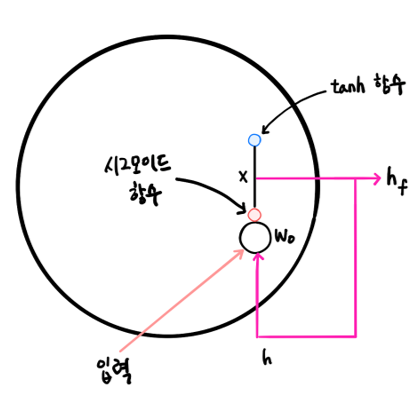

In [ ]:
# 위 그림은 가중치 w_x와 w_h를 통틀어 w_o 라고 표시함
# 파란색 원인 tanh 함수, 주황색 원은 스그모이드 함수임
# x는 곱셈을 나타내고 있음 -> 기본 순환층과 크게 다르지 않음

# tanh 함수를 통과하는 값은 ???
# LSTM에는 순환되는 상태가 2개이다. (은닉상태, 셀상테)
# 은닉상태와 달리 셀 상태는 다음 층으로 전달되지 않고, LSTM 셀에서 순환만 되는 값이다.

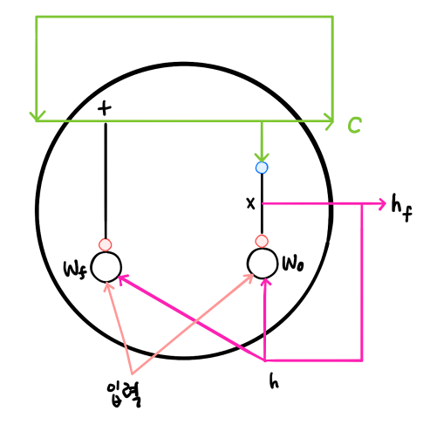

In [ ]:
# 위 그림의 녹색은 순환되는 셀의 상태임
# 셀 상태를 은닉 상태 h와 구분하여 c로 표시함

# 셀 상태를 계산하는 과정
# 먼저 입력과 은닉 상태를 또 가중지 w_f에 곱한 다음 시그모이드 함수를 통과함
# 그다음 이전 타임스탭의 셀 상태와 곱하여 새로운 셀의 상태를 만듬
# 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는데 기여함
# LSTM은 마치 작은 셀을 여러개 포함하고 있는 큰 셀 같다.
# 중요한 것은 입력과 은닉 상태에서 곱해지는 가중지 w_o와 w_f가 다름 (이 두 작은 셀은 각기 다른 기능을 위해 훈련됨)

# 여기에 2개의 작은 셀이 더 추가되어 셀의 상태를 만드는 데 기여함

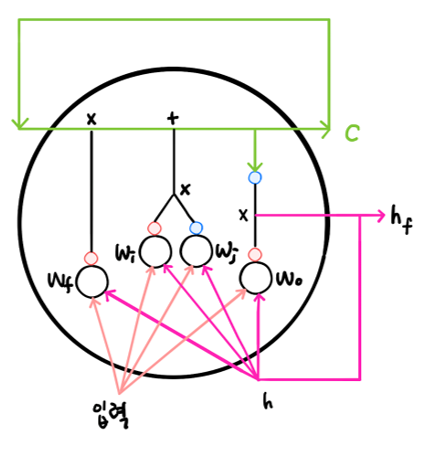

In [ ]:
# 위 그림을 보면 이전과 마찬가지로 입력과 은닉 상태를 각기 다른 가중치에 곱한 다음, 하나는 시그모이드 함수를 통과
# 다른 하나는 tanh 함수를 통과 시킨다. 그다음 두 결과를 곱한 후 이전 셀의 상태와 더함 (최종상태의 셀임)

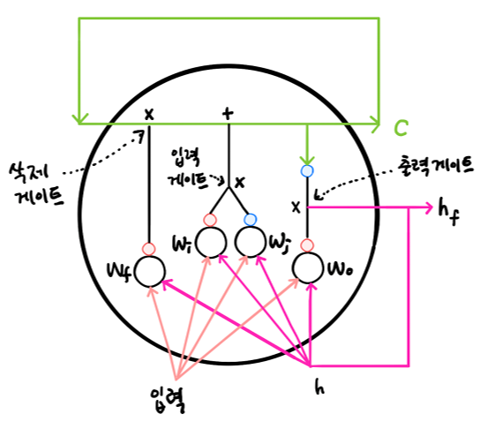

In [ ]:
# 세군데 곱셈을 삭제 게이트, 입력 게이트, 출력 게이트라고 부름
# 삭제게이트는 셀의 상태에 있는 정보를 제거하는 역할
# 입력게이트는 새로운 정보를 셀 상태에 추가
# 출력게이트를 통해 이 셀 상태가 다음 은닉 상태로 출력
# 위의 처리는 케라스의 LSTM클래스가 알아서 돌림

In [1]:
# LSTM 신경망 훈련하기
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

from tensorflow.keras.datasets import imdb # LSTM 신경망 훈련하기
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# 케라스의 pad_sequences()함수로 각 샘플의 길이를 100에 맞추고 부족할 때 패딩을 추가함.
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
# LSTM 셀을 사용한 순환층을 만들어 보자!!! (예전에 썻던 SimpleRNN클래스를 LSTM으로 변경만 하면 됨)
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()
# SimpleRNN 클래스의 모델 파라미터 개수는 200 개였다.
# LSTM 셀에는 작은 셀이 4개 있으므로 정확히 800임

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 컴파일 하고 훈련 시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
# 배치 크기는 64개 , 에포크 회수는 100으로 지정
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # 체크포인트, 조기종료 동일

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.5110 - loss: 0.6929 - val_accuracy: 0.5864 - val_loss: 0.6911
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.5784 - loss: 0.6907 - val_accuracy: 0.6258 - val_loss: 0.6874
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.6217 - loss: 0.6858 - val_accuracy: 0.6562 - val_loss: 0.6765
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.6681 - loss: 0.6682 - val_accuracy: 0.7096 - val_loss: 0.6177
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.7180 - loss: 0.6006 - val_accuracy: 0.7248 - val_loss: 0.5760
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.7282 - loss: 0.5690 - val_accuracy: 0.7404 - val_loss: 0.5555
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.7481 - loss: 0.5465 - val_accuracy: 0.7450 - val_loss: 0.5383
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7600 - loss: 0

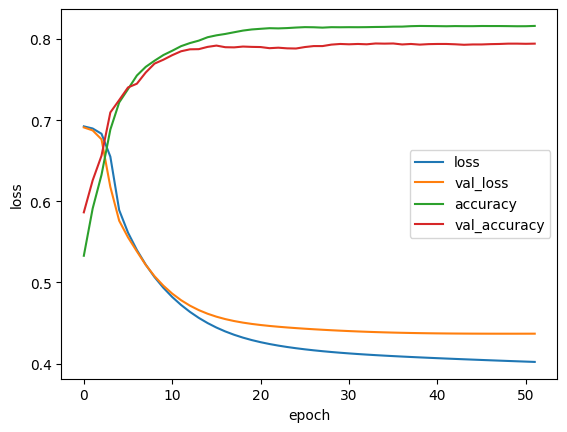

In [7]:
# 52회 에포크에 81.67% 정확도로 나옴

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()

In [ ]:
# 결과를 보면 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행하는 것처럼 보임
# 하지면 경우에 따라서 과대 적합을 더 강하게 제어할 필요가 있다.(드롭 아웃)

In [8]:
# 완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해서 드롭아웃을 적용 하였었다.
# 이를 통해 모델이 훈련세트에 너무 과대적합되는 것을 막았었음

# 순환층은 자체적으로 드롭아웃 기능을 제공한다. (드롭아웃 : 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막음)
# SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음
# dropout은 셀의 입력에 드롭아웃을 적용, recurrent_dropout은 순환은닉 상태에 드롭아웃을 적용함
# recurrent_dropout을 사용하면 GPU를 사용해여 모델을 훈련하지 못함(모델의 훈련속도가 크게 느려짐)
# 그래서 이번에는 dropout만 적용 해볼 것

model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model2.add(keras.layers.LSTM(8, dropout=0.3)) # 드롭아웃 매개값 0.3으로 지정 (30% 입력의 드롭아웃)
model2.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.5145 - loss: 0.6930 - val_accuracy: 0.5716 - val_loss: 0.6922
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.5619 - loss: 0.6920 - val_accuracy: 0.6068 - val_loss: 0.6908
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6025 - loss: 0.6902 - val_accuracy: 0.6288 - val_loss: 0.6879
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.6257 - loss: 0.6865 - val_accuracy: 0.6490 - val_loss: 0.6809
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.6458 - loss: 0.6773 - val_accuracy: 0.6560 - val_loss: 0.6494
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6848 - loss: 0.6394 - val_accuracy: 0.7270 - val_loss: 0.5991
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7198 - loss: 0.5997 - val_accuracy: 0.7404 - val_loss: 0.5803
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.7326 - loss: 0

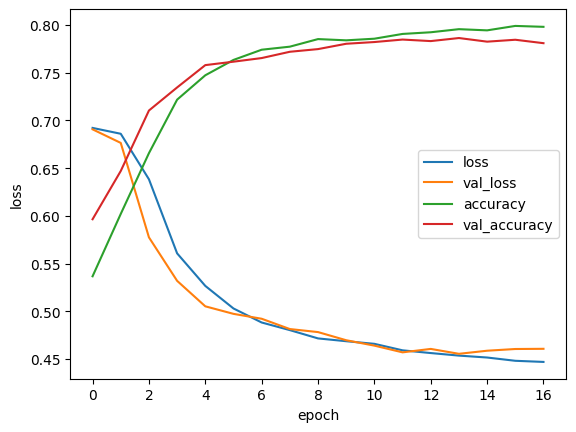

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()
# 훈련손실과 검증 손실 차이가 좁혀진 것을 확인 할 수 있음

In [ ]:
# 2개의 층 연결학
# 순환층을 연결할 때는 한가지 주의할 점이 있는데 순환층의 은닉 상태는 샘플의 마지막 타임스탭에 대한 은닉 상태만 다음층으로 전달됨
# 하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함
# 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태를 출력해야 함
# 오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력 해야 한다. (처음에 본 그림)

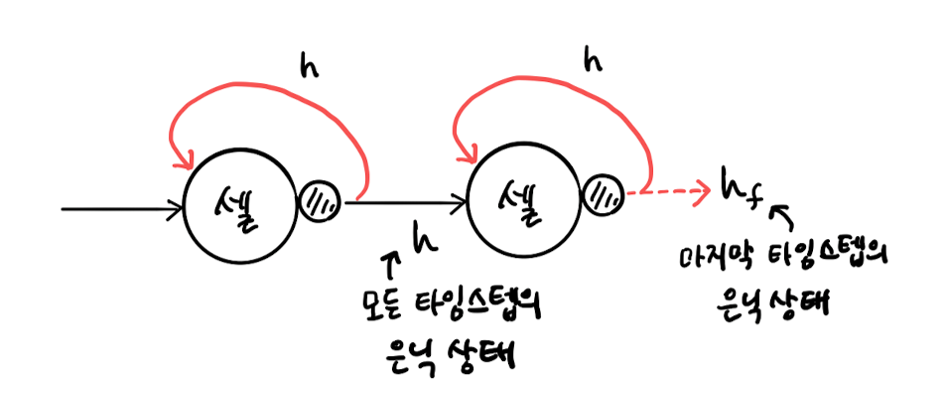

In [10]:
# 케라스의 순환층에서 모든 타임스템의 은닉 상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences=True 로 지정함
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # 1번 LSTM
model3.add(keras.layers.LSTM(8, dropout=0.3))                        # 2번 LSTM
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()
# 첫번째 LSTM 층이 모든 타임스텝(100개)의 은닉상태를 출력하기 때문에 출력 크기가(None, 100, 8)로 표시됨
# 이에 반해 두 번째 LSTM층의 출력 크기는 마지막 타임 스텝의 은닉상태만 출력 하기 때문에 (None, 8)이다.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 훈련시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.5235 - loss: 0.6927 - val_accuracy: 0.5964 - val_loss: 0.6907
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.5854 - loss: 0.6888 - val_accuracy: 0.6470 - val_loss: 0.6764
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.6495 - loss: 0.6604 - val_accuracy: 0.7104 - val_loss: 0.5774
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.7134 - loss: 0.5717 - val_accuracy: 0.7346 - val_loss: 0.5318
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.7405 - loss: 0.5346 - val_accuracy: 0.7580 - val_loss: 0.5051
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.7571 - loss: 0.5090 - val_accuracy: 0.7616 - val_loss: 0.4972
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.7712 - loss: 0.4930 - val_accuracy: 0.7654 - val_loss: 0.4921
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - accuracy: 0.7732 - loss: 0

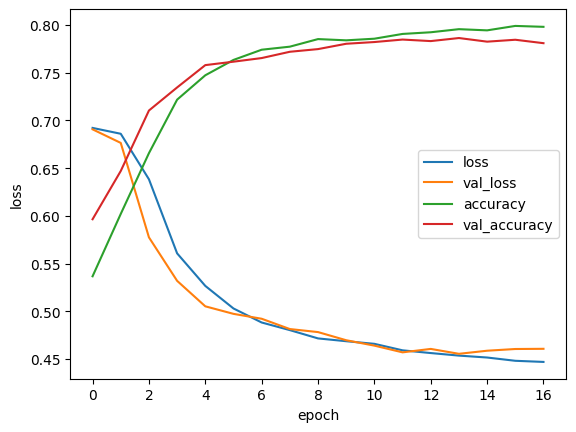

In [14]:
# 과대 적합이 잘 제어 되었는지 확인 해보자.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()
# 그래프를 보면 과대 적합을 제어하면서 손실을 최대한 낮춘 것 같다.

In [ ]:
# GRU(Gated Recurrent Units) 구조
# 뉴욕 대학교 조경현 교수가 발명한 셀로 유명함(LSTM을 간소화 버전으로 만듬)
# 셀상태를 계산하지 않고 은닉상태 하나만 포함하고 있다.

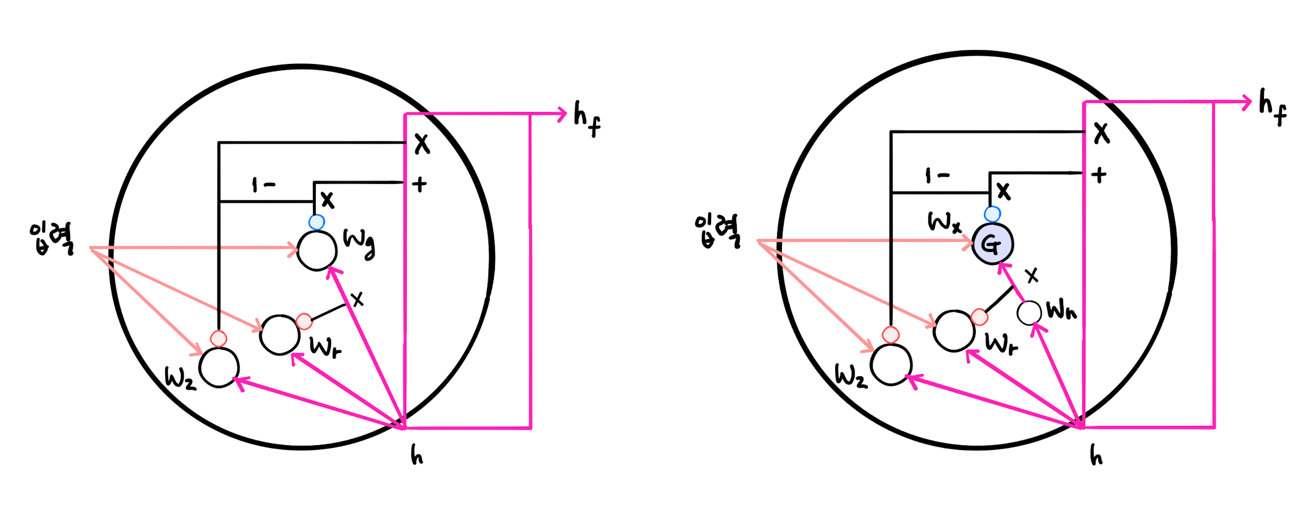

In [ ]:
# GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들 어 있다.
# 2개는 시그모이드 활성화함수를 사용하고 하나느 tanh 활성화 함수를 사용한다.
# 여기에도 은닉 상태와 곱해지는 가중치를 합쳐서 나타냈음

# 맨 왼쪽 w_z를 사용하는 셀의 출력이 은닉 상태에서 바로 곱해져 삭제 게이트 역할을 수행한다.
# 이와 똑같은 출력은 1에서 뺀 다음에 가장 오른쪽 w_g를 사용하는 셀의 출력에 곱한다.
# 이는 입력되는 정보를 제어하는 역할을 수행한다.
# 가운데 w_r을 사용하는 셀에서는 출력된 w_g 셀이 사용할 은닉 상태의 정보를 제어한다.

# GRU셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지 않은 좋은 성능을 내는 것으로 알려져 있다.

In [15]:
# GRU 신경망 훈련하기
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model4.add(keras.layers.GRU(8)) # GRU로 변경함
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()
# 파라미터를 계산해보면 GRU 셀에는 3개의 작은 셀이 있다.
# 작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있다.
# 입력에 곱하는 가중치는 16 * 8 = 128개 이고, 은닉 상태에 곱하는 가중치는 8 * 8 = 64 이다.
# 절편은 뉴런마다 하나씩이므로 8개임, 모두 더하면 128 + 64 + 8 = 200 이런 작은 셀이 3개 이므로 600개 임

# 624개가 된 이유는 3개의 절편마다 8개의 뉴런까지 존재하기 때문에 3 * 8 = 24 까지 더해짐\
# 텐서플로가 이런 계산 방식을 사용하는 이유는 GPU를 잘 활용하기 위해서 임 (LSTM 개선점)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 신경망 훈련 시작!

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.5052 - loss: 0.6931 - val_accuracy: 0.5206 - val_loss: 0.6928
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.5532 - loss: 0.6925 - val_accuracy: 0.5616 - val_loss: 0.6921
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.5831 - loss: 0.6917 - val_accuracy: 0.5714 - val_loss: 0.6911
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.5901 - loss: 0.6903 - val_accuracy: 0.5844 - val_loss: 0.6893
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.6033 - loss: 0.6882 - val_accuracy: 0.5938 - val_loss: 0.6866
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.6136 - loss: 0.6849 - val_accuracy: 0.6036 - val_loss: 0.6822
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.6197 - loss: 0.6796 - val_accuracy: 0.6120 - val_loss: 0.6752
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.6300 - loss: 0

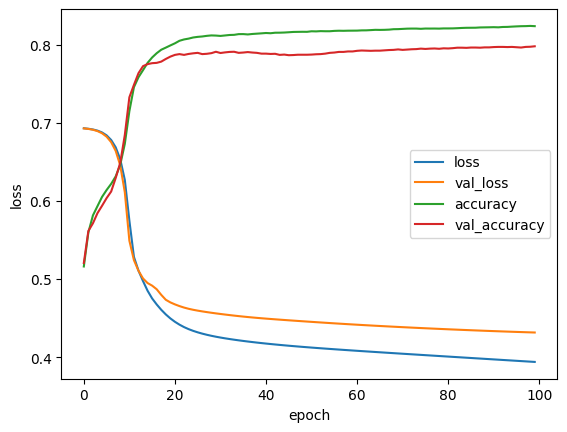

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()

In [18]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.keras')

rnn_model.evaluate(test_seq, test_target)
# 테스트 성능 계산 해보자~

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7877 - loss: 0.4545


[0.45431801676750183, 0.7878400087356567]